# Métodos Clásicos de Optimización para Problemas No Lineales sin Restricciones

Dada una función escalar $f(\mathbf{x}): \mathbb{R}^n \rightarrow \mathbb{R}$, dos veces diferenciable y continua, se desea encontrar $\mathbf{x} \in \mathbb{R}^n$ tal que:

$$
\min_{\mathbf{x} \in \mathbb{R}^n} f(\mathbf{x})
$$



## Mínimos

- Un punto $\mathbf{x}^* \in \mathbb{R}^n$ es un **mínimo global** de $f$ si:

$$
f(\mathbf{x}^*) \leq f(\mathbf{x}) \quad \text{para todo } \mathbf{x} \in \mathbb{R}^n
$$

- Un punto $\mathbf{x}^*$ es un **mínimo local** de $f$ si existe un radio $r > 0$ tal que:

$$
f(\mathbf{x}^*) \leq f(\mathbf{x}) \quad \text{para todo } \mathbf{x} \text{ tal que } \|\mathbf{x} - \mathbf{x}^*\| \leq r
$$

- El mínimo global es un caso particular de mínimo local con la propiedad adicional de que ningún otro punto tiene un valor menor de $f$.



## Condiciones de Optimalidad

**Teorema:** Un punto $\mathbf{x}^*$ es un mínimo local de $f$ si se cumplen las siguientes condiciones:

1. **Condición de primer orden (punto estacionario):**

$$
\nabla f(\mathbf{x}^*) = \mathbf{0}
$$

2. **Condición de segundo orden:** La matriz Hessiana $\nabla^2 f(\mathbf{x}^*)$ es **definida positiva**:

$$
\nabla^2 f(\mathbf{x}^*) =
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}
$$


## Métodos Numéricos de Optimización

Como resolver analíticamente este sistema puede ser complejo, se utilizan **métodos numéricos de descenso**, que se clasifican en:

$$
\text{Métodos de Descenso} \left\{
\begin{matrix}
\text{Primer Orden} & \left\{ \begin{matrix}
\text{Método del Gradiente} \\
\text{Gradiente Conjugado}
\end{matrix} \right. \\\\
\text{Segundo Orden} & \left\{ \begin{matrix}
\text{Método de Newton}
\end{matrix} \right. \\\\
\text{Cuasi-Newton} & \left\{ \begin{matrix}
\text{DFP (Davidon–Fletcher–Powell)} \\
\text{BFGS (Broyden–Fletcher–Goldfarb–Shanno)}
\end{matrix} \right.
\end{matrix}
\right.
$$



## Propiedades de los Métodos

### Método del Gradiente Descendente

- Dirección de búsqueda: $-\nabla f(\mathbf{x}_k)$.
- Paso $\alpha_k$ debe cumplir: $\nabla f(\mathbf{x}_k + \alpha_k \mathbf{d}_k) \cdot \mathbf{d}_k = 0$ (difícil de cumplir exactamente, se usan aproximaciones).
- **Convergencia lineal**: 
  $$
  \|\mathbf{x}_{k+1} - \mathbf{x}^*\| \leq \lambda \|\mathbf{x}_k - \mathbf{x}^*\|, \quad 0 < \lambda < 1
  $$
- Direcciones consecutivas ortogonales.
- Convergencia lenta, incluso para funciones cuadráticas.

### Método del Gradiente Conjugado

- Problema cuadrático: $f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^T Q \mathbf{x} - \mathbf{b}^T \mathbf{x}$, con $Q$ definida positiva.
- Las direcciones son $Q$-conjugadas.
- **Convergencia exacta en a lo más $n$ pasos** (en aritmética exacta).

### Método de Newton

- Usa una aproximación cuadrática de $f$ para determinar el siguiente punto:
  $$
  \mathbf{x}_{k+1} = \mathbf{x}_k - t_k \nabla^2 f(\mathbf{x}_k)^{-1} \nabla f(\mathbf{x}_k)
  $$
- Requiere calcular y **almacenar la matriz Hessiana** y su inversa.
- **Convergencia cuadrática** (muy rápida cerca del óptimo):
  $$
  \|\mathbf{x}_{k+1} - \mathbf{x}^*\| \leq \lambda \|\mathbf{x}_k - \mathbf{x}^*\|^2
  $$
- El punto inicial debe ser razonablemente cercano al óptimo.

>  Evaluar derivadas de segundo orden (Hessiana) puede ser muy costoso: requiere $O(n^2)$ espacio y $O(n^3)$ operaciones para la inversión de matrices.

### Métodos Cuasi-Newton

- Sustituyen la Hessiana por una aproximación iterativa $S_k \approx \nabla^2 f(\mathbf{x}_k)^{-1}$.
- Fórmulas de actualización como DFP o BFGS permiten mantener buena convergencia sin cálculo explícito de derivadas de segundo orden.
- Iteración típica:
  $$
  \mathbf{x}_{k+1} = \mathbf{x}_k - t_k S_k \nabla f(\mathbf{x}_k)
  $$



## Comparación de Métodos

| Método               | Velocidad de Convergencia | Información Requerida           | Costo Computacional          |
|----------------------|---------------------------|----------------------------------|-------------------------------|
| Gradiente Descendente | Lineal                    | Gradiente                        | Bajo $\mathcal{O}(n)$         |
| Gradiente Conjugado   | Lineal (pero mejora)      | Gradiente, $Q$ definida positiva | Moderado $\mathcal{O}(n^2)$   |
| Newton                | Cuadrática (local)        | Gradiente + Hessiana             | Alto ($O(n^3)$ por iteración) |
| Cuasi-Newton (BFGS)   | Superlineal               | Gradiente                        | Moderado $\mathcal{O}(n^2)$   |


### Notas:

- El método de **Newton** requiere calcular y resolver un sistema con la Hessiana, lo cual es costoso pero ofrece convergencia cuadrática.
- **BFGS** aproxima la Hessiana, evitando ese costo y logrando mejor rendimiento que el gradiente descendente.
- **Gradiente Conjugado** es muy eficiente en problemas cuadráticos simétricos positivos definidos y converge en a lo sumo $n$ pasos exactos (en aritmética exacta).

# Ejemplo Comparativo de Métodos de Optimización en una Función Cuadrática

En este ejemplo, consideramos el problema de minimizar la función cuadrática:

$$
f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^T Q \mathbf{x} - \mathbf{b}^T \mathbf{x} =si,
$$

donde se definen:

 $$ Q = \begin{bmatrix} 3 & 2 \\ 2 & 6 \end{bmatrix}, $$
 $$ \mathbf{b} = \begin{bmatrix} 2 \\ -8 \end{bmatrix}. $$

La función es convexa y tiene un único mínimo global, el cual se obtiene al resolver

$$
Q \mathbf{x} = \mathbf{b}.
$$

Este ejemplo comparan los algoritmos de optimización sin restricciones:


1. **Gradiente Descendente**:  
   - Actualiza la solución en la dirección opuesta al gradiente:  
     $$
     \mathbf{x}_{k+1} = \mathbf{x}_k - \alpha \nabla f(\mathbf{x}_k).
     $$  
   - Usa un tamaño de paso constante y requiere muchas iteraciones, lo que conduce a una convergencia lenta.

2. **Gradiente Conjugado**:  
   - Está diseñado para problemas cuadráticos como el anterior.  
   - Genera direcciones de búsqueda que son $Q$-conjugadas, lo que permite llegar al mínimo en a lo sumo $n$ pasos (en aritmética exacta, para un problema de dimensión $n$).  
   - En nuestro caso, al ser $n = 2$, converge en dos iteraciones.

3. **Método de Newton**:  
   - Aprovecha la información de la segunda derivada (la Hessiana) para ajustar la dirección del paso:  
     $$
     \mathbf{x}_{k+1} = \mathbf{x}_k - t_k \nabla^2 f(\mathbf{x}_k)^{-1} \nabla f(\mathbf{x}_k).
     $$  
   - Ofrece una convergencia cuadrática cerca del óptimo, reduciendo drásticamente el error en cada iteración.  
   - Sin embargo, en problemas de mayor dimensión, el cálculo y la inversión de la Hessiana pueden resultar costosos.

4. **Método Cuasi-Newton (BFGS)**:  
   - Construye una aproximación iterativa a la inversa de la Hessiana, evitando calcularla directamente.  
   - Actualiza la solución usando esta matriz aproximada:  
     $$
     \mathbf{x}_{k+1} = \mathbf{x}_k - \alpha_k \mathbf{S}_k \nabla f(\mathbf{x}_k),
     $$  
     donde $\mathbf{S}_k$ es la aproximación a la inversa de la Hessiana en la iteración $k$.  
   - La matriz $\mathbf{S}_k$ se actualiza en cada paso usando diferencias de gradientes y soluciones previas, con la fórmula BFGS, garantizando que $\mathbf{S}_k$ sea siempre positiva definida.  
   - Combina la rapidez del método de Newton con un costo computacional mucho menor, siendo muy efectivo en problemas de gran dimensión.



Ejemplo:  minimizar la función cuadrática

$$
f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^T Q \mathbf{x} - \mathbf{b}^T \mathbf{x}
$$

donde 

$$
Q = \begin{bmatrix} 3 & 2 \\ 2 & 6 \end{bmatrix}, \quad \mathbf{b} = \begin{bmatrix} 2 \\ -8 \end{bmatrix}.
$$

Esta función es estrictamente convexa porque la matriz $Q$ es simétrica definida positiva, por lo que tiene un único mínimo global.
Se
1. **Gradiente Descendente**:  
- Actualiza la solución en la dirección opuesta al gradiente de la función en el punto actual:  
  $$
  \mathbf{x}_{k+1} = \mathbf{x}_k - \alpha_k \nabla f(\mathbf{x}_k),
  $$  
  donde $\alpha_k > 0$ es el tamaño de paso o tasa de aprendizaje en la iteración $k$.  
- El gradiente $\nabla f(\mathbf{x}_k)$ indica la dirección de máximo aumento de la función, por lo que movernos en la dirección opuesta reduce el valor de $f$.  
- El tamaño de paso $\alpha_k$ puede ser constante o calculado adaptativamente (por ejemplo, usando búsqueda en línea).  
- Este método es sencillo pero puede requerir muchas iteraciones para converger, especialmente si la función tiene curvas muy pronunciadas o es mal condicionada.  
- La convergencia es generalmente lineal y depende mucho de la elección de $\alpha_k$.

2. **Gradiente Conjugado**:  
   - Está diseñado para problemas cuadráticos como el anterior.  
   - Genera direcciones de búsqueda que son $Q$-conjugadas, lo que permite llegar al mínimo en a lo sumo $n$ pasos (en aritmética exacta, para un problema de dimensión $n$).  
   - En cada iteración, la solución se actualiza en la dirección conjugada:  
     $$
     \mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k \mathbf{p}_k,
     $$  
     donde $\mathbf{p}_k$ es la dirección conjugada en la iteración $k$, y el tamaño de paso $\alpha_k$ se calcula como  
     $$
     \alpha_k = \frac{\mathbf{r}_k^T \mathbf{r}_k}{\mathbf{p}_k^T Q \mathbf{p}_k},
     $$  
     siendo $\mathbf{r}_k = \nabla f(\mathbf{x}_k)$ el residuo o gradiente en la iteración $k$.  
   - La nueva dirección conjugada se actualiza con  
     $$
     \mathbf{p}_{k+1} = -\mathbf{r}_{k+1} + \beta_k \mathbf{p}_k,
     $$  
     donde  
     $$
     \beta_k = \frac{\mathbf{r}_{k+1}^T \mathbf{r}_{k+1}}{\mathbf{r}_k^T \mathbf{r}_k}.
     $$  
   - En nuestro caso, al ser $n = 2$, converge en dos iteraciones.

3. **Método de Newton**:  
   - Aprovecha la información de la segunda derivada (la Hessiana) para ajustar la dirección del paso:  
     $$
     \mathbf{x}_{k+1} = \mathbf{x}_k - t_k \nabla^2 f(\mathbf{x}_k)^{-1} \nabla f(\mathbf{x}_k).
     $$  
   - Ofrece una convergencia cuadrática cerca del óptimo, reduciendo drásticamente el error en cada iteración.  
   - Sin embargo, en problemas de mayor dimensión, el cálculo y la inversión de la Hessiana pueden resultar costosos.

4. **Método Cuasi-Newton (BFGS)**:  
   - Construye una aproximación iterativa a la inversa de la Hessiana, evitando calcularla directamente.  
   - Actualiza la solución usando esta matriz aproximada:  
     $$
     \mathbf{x}_{k+1} = \mathbf{x}_k - \alpha_k \mathbf{S}_k \nabla f(\mathbf{x}_k),
     $$  
     donde $\mathbf{S}_k$ es la aproximación a la inversa de la Hessiana en la iteración $k$.  
   - La matriz $\mathbf{S}_k$ se actualiza en cada paso usando diferencias de gradientes y soluciones previas, con la fórmula BFGS, garantizando que $\mathbf{S}_k$ sea siempre positiva definida.  
   - Combina la rapidez del método de Newton con un costo computacional mucho menor, siendo muy efectivo en problemas de gran dimensión.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función cuadrática: f(x) = (1/2) x^T Q x - b^T x
Q = np.array([[3.0, 2.0], [2.0, 6.0]])
b = np.array([2.0, -8.0])

def f(x):
    return 0.5 * x.T @ Q @ x - b.T @ x

def grad_f(x):
    return Q @ x - b

def hess_f(x):
    return Q

# Parámetros
x0 = np.array([0.0, 0.0])
tol = 1e-6
max_iter = 50

# Gradiente Descendente con paso fijo
def gradient_descent(x0, alpha=0.1):
    xk = x0.copy()
    history = [xk.copy()]
    for _ in range(max_iter):
        grad = grad_f(xk)
        if np.linalg.norm(grad) < tol:
            break
        xk = xk - alpha * grad
        history.append(xk.copy())
    return np.array(history)

# Newton con paso completo
def newton_method(x0):
    xk = x0.copy()
    history = [xk.copy()]
    for _ in range(max_iter):
        grad = grad_f(xk)
        if np.linalg.norm(grad) < tol:
            break
        H = hess_f(xk)
        delta = np.linalg.solve(H, grad)
        xk = xk - delta
        history.append(xk.copy())
    return np.array(history)

# Cuasi-Newton BFGS con paso completo (alpha=1)
def bfgs_method(x0):
    xk = x0.copy()
    n = len(x0)
    Hk = np.eye(n)
    history = [xk.copy()]
    for _ in range(max_iter):
        grad = grad_f(xk)
        if np.linalg.norm(grad) < tol:
            break
        pk = -Hk @ grad
        xk_new = xk + pk  # paso completo (alpha=1)
        sk = xk_new - xk
        yk = grad_f(xk_new) - grad
        if yk.T @ sk > 1e-10:
            rho = 1.0 / (yk.T @ sk)
            I = np.eye(n)
            Hk = (I - rho * np.outer(sk, yk)) @ Hk @ (I - rho * np.outer(yk, sk)) + rho * np.outer(sk, sk)
        xk = xk_new
        history.append(xk.copy())
    return np.array(history)

# Gradiente Conjugado
def conjugate_gradient(x0):
    xk = x0.copy()
    r = grad_f(xk)
    p = -r
    history = [xk.copy()]
    for _ in range(max_iter):
        Ap = Q @ p
        alpha = r.T @ r / (p.T @ Ap)
        xk = xk + alpha * p
        r_new = r + alpha * Ap
        history.append(xk.copy())
        if np.linalg.norm(r_new) < tol:
            break
        beta = r_new.T @ r_new / (r.T @ r)
        p = -r_new + beta * p
        r = r_new
    return np.array(history)

# Ejecutar métodos
gd_hist = gradient_descent(x0)
nt_hist = newton_method(x0)
bfgs_hist = bfgs_method(x0)
cg_hist = conjugate_gradient(x0)

# Punto óptimo analítico
optimum = np.linalg.solve(Q, b)

# Distancia al óptimo para cada iteración
def distance(history):
    return np.linalg.norm(history - optimum, axis=1)

plt.figure(figsize=(8,5))
plt.semilogy(distance(gd_hist), label='Gradiente Descendente')
plt.semilogy(distance(nt_hist), label='Newton')
plt.semilogy(distance(bfgs_hist), label='BFGS (Cuasi-Newton)')
plt.semilogy(distance(cg_hist), label='Gradiente Conjugado')
plt.xlabel('Iteraciones')
plt.ylabel('Distancia al mínimo (escala logarítmica)')
plt.title('Convergencia de Métodos de Optimización')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Función para calcular el valor de f en la última solución de cada método
def f_val(ultimo_punto):
    return f(ultimo_punto)

# Crear datos para la tabla
data = {
    "Método": ["Gradiente Descendente", "Newton", "BFGS (Cuasi-Newton)", "Gradiente Conjugado"],
    "Iteraciones": [len(gd_hist)-1, len(nt_hist)-1, len(bfgs_hist)-1, len(cg_hist)-1],
    "Solución encontrada": [gd_hist[-1], nt_hist[-1], bfgs_hist[-1], cg_hist[-1]],
    "Valor mínimo alcanzado": [f_val(gd_hist[-1]), f_val(nt_hist[-1]), f_val(bfgs_hist[-1]), f_val(cg_hist[-1])]
}

df = pd.DataFrame(data)

# Formatear columnas para que se vean mejor
df["Solución encontrada"] = df["Solución encontrada"].apply(lambda x: np.round(x, 6))
df["Valor mínimo alcanzado"] = df["Valor mínimo alcanzado"].apply(lambda x: round(x, 6))

df


## Método de Gradiente Descendente 

Dada una función diferenciable 
$$
f : \mathbb{R}^n \to \mathbb{R}
$$
que queremos minimizar, el método de **gradiente descendente** genera una secuencia de puntos 
$$
\{\mathbf{x}_k\}
$$
a partir de una solución inicial $\mathbf{x}_0$, actualizando iterativamente mediante la regla

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - t_k \nabla f(\mathbf{x}_k), \quad k=0,1,2,\ldots
$$

donde $\nabla f(\mathbf{x}_k)$ es el gradiente de la función en $\mathbf{x}_k$, y $t_k > 0$ es el tamaño de paso o *learning rate*.


### Intuición del método

- El gradiente $\nabla f(\mathbf{x}_k)$ apunta en la dirección de máximo crecimiento de la función $f$, por lo que su negativo, $-\nabla f(\mathbf{x}_k)$, es la dirección de máximo descenso local.  
- Actualizando $\mathbf{x}_k$ en esa dirección se busca reducir el valor de la función en cada paso, acercándose al mínimo.


### Selección del tamaño de paso $t_k$

- En la práctica, $t_k$ puede ser:
  - Un valor fijo pequeño (constante en todas las iteraciones).
  - Un valor que disminuye con $k$ (para garantizar convergencia).
  - Determinado mediante métodos heurísticos o reglas de búsqueda (por ejemplo, búsqueda en línea o backtracking).
  
- La elección adecuada de $t_k$ es crucial:
  - Si $t_k$ es muy pequeño, la convergencia es muy lenta.
  - Si $t_k$ es muy grande, puede que no se reduzca el valor de $f$ o que el método diverja.


### Resumen del algoritmo

1. Inicializar $\mathbf{x}_0$.
2. Para $k = 0, 1, 2, \ldots$ hasta convergencia:
   - Calcular el gradiente $\nabla f(\mathbf{x}_k)$.
   - Elegir un tamaño de paso $t_k$.
   - Actualizar la solución:
     $$
     \mathbf{x}_{k+1} = \mathbf{x}_k - t_k \nabla f(\mathbf{x}_k).
     $$
3. Detener cuando el gradiente es suficientemente pequeño o se alcanza un máximo de iteraciones.


Este método es simple y ampliamente utilizado, especialmente en problemas de optimización con muchas variables, aunque puede ser lento si no se elige adecuadamente el tamaño de paso o si la función tiene regiones planas o curvas pronunciadas.


Consideremos la función

$$
f(\mathbf{x}) = x_1^2 + 2x_2^2,
$$

donde $\mathbf{x} = (x_1, x_2) \in \mathbb{R}^2$.

### Cálculo del mínimo analíticamente usando derivadas

1. Calculamos el gradiente de \(f\):

$$
\nabla f(\mathbf{x}) = \left[\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}\right] = [2x_1, 4x_2].
$$

2. Para encontrar los puntos críticos, igualamos el gradiente a cero:

$$
\nabla f(\mathbf{x}) = \mathbf{0} \implies 
\begin{cases}
2x_1 = 0 \\
4x_2 = 0
\end{cases} \implies (x_1, x_2) = (0, 0).
$$

3. Calculamos la matriz Hessiana de \(f\):

$$
H = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2}
\end{bmatrix}
= \begin{bmatrix}
2 & 0 \\
0 & 4
\end{bmatrix}.
$$

4. Calculamos los valores propios de la Hessiana \(H\) para verificar su positividad:

$$
\det(H - \lambda I) = \det \begin{bmatrix}
2 - \lambda & 0 \\
0 & 4 - \lambda
\end{bmatrix} = (2 - \lambda)(4 - \lambda) = 0.
$$

De donde obtenemos los valores propios:

$$
\lambda_1 = 2, \quad \lambda_2 = 4.
$$

Dado que ambos valores propios son positivos, la matriz Hessiana es positiva definida.



La función $f(\mathbf{x})$ es convexa y tiene un único mínimo global en $\mathbf{x} = (0,0)$, donde

$$
f(0,0) = 0.
$$

El método de gradiente descendente iterativamente aproxima este mínimo actualizando la solución en la dirección opuesta al gradiente.

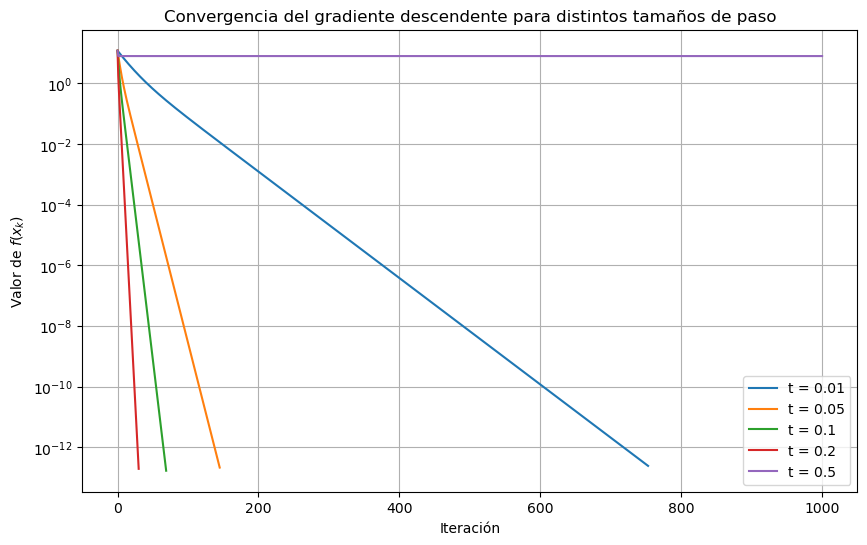

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    # Función objetivo
    return x[0]**2 + 2*x[1]**2

def grad_f(x):
    # Gradiente de la función
    return np.array([2*x[0], 4*x[1]])

def gradiente_descendente(x0, t, tol=1e-6, max_iter=1000):
    xk = x0.copy()
    history = [f(xk)]
    
    for k in range(max_iter):
        g = grad_f(xk)
        if np.linalg.norm(g) < tol:
            break
        xk = xk - t * g
        history.append(f(xk))
    return history

# Punto inicial
x0 = np.array([2.0, 2.0])

# Valores de learning rate a probar
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5]

plt.figure(figsize=(10,6))

for t in learning_rates:
    valores = gradiente_descendente(x0, t)
    plt.plot(valores, label=f"t = {t}")

plt.yscale("log")  # Escala logarítmica para ver mejor la convergencia
plt.xlabel("Iteración")
plt.ylabel("Valor de $f(x_k)$")
plt.title("Convergencia del gradiente descendente para distintos tamaños de paso")
plt.legend()
plt.grid(True)
plt.show()


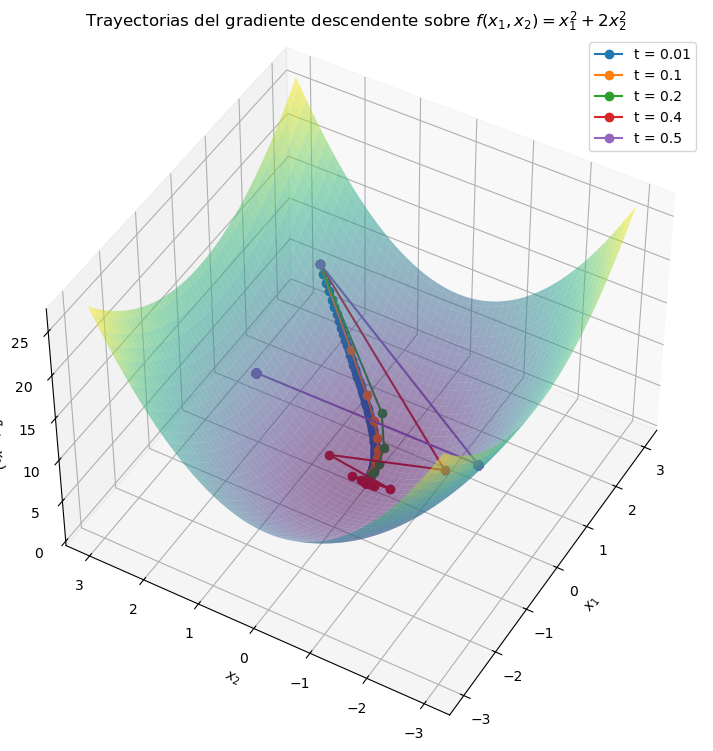

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x):
    return x[0]**2 + 2*x[1]**2

def grad_f(x):
    return np.array([2*x[0], 4*x[1]])

def gradiente_descendente(x0, t, tol=1e-6, max_iter=1000):
    xk = x0.copy()
    history = [xk.copy()]
    for k in range(max_iter):
        g = grad_f(xk)
        if np.linalg.norm(g) < tol:
            break
        xk = xk - t * g
        history.append(xk.copy())
    return np.array(history)

x_vals = np.linspace(-3, 3, 100)
y_vals = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X**2 + 2*Y**2

x0 = np.array([2.0, 2.0])
learning_rates = [0.01, 0.1, 0.2, 0.4, 0.5]

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis', edgecolor='none')

for t in learning_rates:
    tray = gradiente_descendente(x0, t)
    z_tray = np.array([f(p) for p in tray])
    ax.plot(tray[:,0], tray[:,1], z_tray, label=f't = {t}', marker='o')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')
ax.set_title('Trayectorias del gradiente descendente sobre $f(x_1, x_2) = x_1^2 + 2x_2^2$')

# Cambiar ángulo de vista para mejor visualización
ax.view_init(elev=45, azim=210)

ax.legend()
plt.show()

# Gradiente Descendente con paso exacto

Consideremos una función diferenciable $f : \mathbb{R}^n \to \mathbb{R}$. Dado un punto inicial $\mathbf{x}_0$, el gradiente

$$
\nabla f(\mathbf{x}) = \left[\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_n} \right]^T
$$

indica la dirección de máximo aumento, por lo que la dirección de descenso es

$$
-\nabla f(\mathbf{x}_0).
$$


## Definición de la Función Unidimensional $\phi_k(t)$

Para encontrar el tamaño de paso $t_k$ que minimiza $f$ en la dirección de descenso, definimos:

$$
\phi_k(t) = f\left( \mathbf{x}_k - t \nabla f(\mathbf{x}_k) \right).
$$

Esta es una función de una variable $t \geq 0$, que indica el valor de $f$ al movernos desde $\mathbf{x}_k$ en la dirección de máximo descenso.



## Cálculo de $t_k$ que Minimiza $\phi_k(t)$

El objetivo es encontrar

$$
t_k = \arg\min_{t > 0} \phi_k(t).
$$

Para esto podemos:

1. Derivar $\phi_k(t)$ respecto a $t$:

$$
\phi_k'(t) = \frac{d}{dt} f\left( \mathbf{x}_k - t \nabla f(\mathbf{x}_k) \right).
$$

2. Igualar a cero para encontrar puntos críticos:

$$
\phi_k'(t) = 0.
$$

3. Confirmar que el punto encontrado corresponde a un mínimo (por ejemplo, $\phi_k''(t) > 0$).



## Ejemplo Sencillo

Tomemos la función unidimensional

$$
f(x) = (x - 3)^2,
$$

que tiene su mínimo global en $x = 3$.

### Paso 1: Calculamos el gradiente (derivada)

$$
\nabla f(x) = 2(x - 3).
$$

Supongamos que partimos desde $x_0 = 0$.

### Paso 2: Definimos la función $\phi_0(t)$

$$
\phi_0(t) = f\big(x_0 - t \nabla f(x_0)\big) = f\big(0 - t \cdot 2(0 - 3)\big) = f(0 + 6t) = (6t - 3)^2.
$$

### Paso 3: Derivamos $\phi_0(t)$

$$
\phi_0'(t) = 2(6t - 3) \cdot 6 = 12(6t - 3).
$$

### Paso 4: Igualamos a cero y resolvemos para $t$

$$
\phi_0'(t) = 0 \quad \Rightarrow \quad 12(6t - 3) = 0 \quad \Rightarrow \quad 6t - 3 = 0 \quad \Rightarrow \quad t = \frac{1}{2}.
$$

### Paso 5: Actualizamos la solución

$$
x_1 = x_0 - t \nabla f(x_0) = 0 - \frac{1}{2} \cdot 2 (0 - 3) = 0 - \frac{1}{2} \cdot (-6) = 3.
$$

En una sola iteración hemos llegado al mínimo exacto $x=3$.



## Resumen del Método

1. En cada iteración $k$, calculamos el gradiente $\nabla f(\mathbf{x}_k)$.
2. Definimos la función unidimensional

$$
\phi_k(t) = f\left(\mathbf{x}_k - t \nabla f(\mathbf{x}_k)\right).
$$

3. Calculamos $t_k$ minimizando $\phi_k(t)$ (derivando e igualando a cero).
4. Actualizamos

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - t_k \nabla f(\mathbf{x}_k).
$$

5. Repetimos hasta convergencia.


Esta forma de calcular el paso exacto garantiza que en cada iteración se avanza optimizando el tamaño del paso para acelerar la convergencia.

Convergencia alcanzada en iteración 1
Mínimo encontrado en x = 3.0


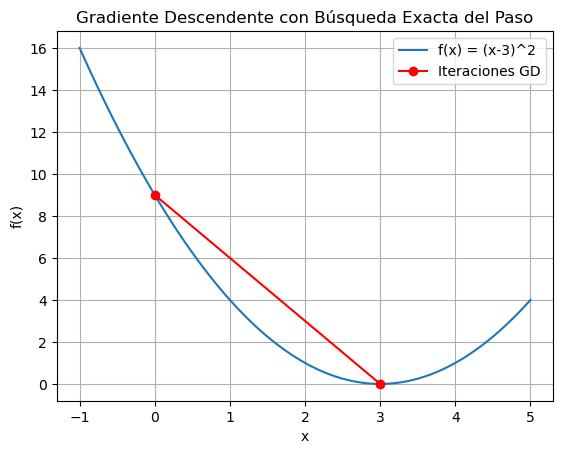

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Función objetivo unidimensional
def f(x):
    return (x - 3)**2

# Derivada de la función (gradiente)
def grad_f(x):
    return 2 * (x - 3)

# Definimos phi_k(t) = f(x_k - t * grad_f(x_k))
def phi(t, xk):
    return f(xk - t * grad_f(xk))

# Derivada de phi_k(t) respecto a t (calculada analíticamente)
def dphi_dt(t, xk):
    # grad_f(xk) es 2(xk - 3)
    # phi(t) = (xk - t*grad_f(xk) - 3)^2
    # phi'(t) = 2 * (xk - t*grad_f(xk) - 3) * (-grad_f(xk))
    return 2 * (xk - t * grad_f(xk) - 3) * (-grad_f(xk))

# Búsqueda exacta de t_k (resolviendo dphi_dt(t) = 0)
def exact_line_search(xk):
    # Igualamos dphi_dt(t) = 0:
    # 2 * (xk - t*grad_f(xk) - 3) * (-grad_f(xk)) = 0
    # Se anula si (xk - t*grad_f(xk) - 3) = 0
    gk = grad_f(xk)
    return (xk - 3) / gk  # cuidado con la división por cero

# Gradiente descendente con búsqueda exacta
def gradient_descent_exact(x0, tol=1e-6, max_iter=100):
    xk = x0
    history = [xk]
    for i in range(max_iter):
        gk = grad_f(xk)
        if abs(gk) < tol:
            print(f"Convergencia alcanzada en iteración {i}")
            break
        tk = exact_line_search(xk)
        xk = xk - tk * gk
        history.append(xk)
    return xk, history

# Ejecutar gradiente descendente desde x0=0
x0 = 0.0
xmin, history = gradient_descent_exact(x0)

print(f"Mínimo encontrado en x = {xmin}")

# Graficar la función y el proceso de minimización
x_vals = np.linspace(-1, 5, 400)
f_vals = f(x_vals)

plt.plot(x_vals, f_vals, label="f(x) = (x-3)^2")
plt.plot(history, [f(x) for x in history], 'ro-', label="Iteraciones GD")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradiente Descendente con Búsqueda Exacta del Paso")
plt.legend()
plt.grid(True)
plt.show()
